In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RESULTS_DIR = "results/movielens_long_results"

### BCMABRP

In [3]:
with open(f'{RESULTS_DIR}/results_movielens_bcmabrp_t_100000_n_5_d_6.pickle', "rb") as f:
    bcmabrp6 = pickle.load(f)

In [4]:
with open(f'{RESULTS_DIR}/results_movielens_bcmabrp_t_100000_n_5_d_12.pickle', "rb") as f:
    bcmabrp12 = pickle.load(f)

In [5]:
with open(f'{RESULTS_DIR}/results_movielens_bcmabrp_t_100000_n_5_d_24.pickle', "rb") as f:
    bcmabrp24 = pickle.load(f)

In [6]:
bcmabrp_dict = {
    'BCMABRP (d=6)': np.mean(np.stack(bcmabrp6[1]['BCMABRP (nu=0.65)']), axis=0),
    'BCMABRP (d=12)': np.mean(np.stack(bcmabrp12[1]['BCMABRP (nu=0.65)']), axis=0),
    'BCMABRP (d=24)': np.mean(np.stack(bcmabrp24[1]['BCMABRP (nu=0.65)']), axis=0)
}

### CBRAP

In [7]:
with open(f'{RESULTS_DIR}/results_movielens_cbrap_t_100000_n_5_d_6.pickle', "rb") as f:
    cbrap6 = pickle.load(f)

In [8]:
with open(f'{RESULTS_DIR}/results_movielens_cbrap_t_100000_n_5_d_12.pickle', "rb") as f:
    cbrap12 = pickle.load(f)

In [9]:
with open(f'{RESULTS_DIR}/results_movielens_cbrap_t_100000_n_5_d_24.pickle', "rb") as f:
    cbrap24 = pickle.load(f)

In [10]:
cbrap_dict = {
    'CBRAP (d=6)': np.mean(np.stack(cbrap6[1]['CBRAP (alpha=0.5)']), axis=0),
    'CBRAP (d=12)': np.mean(np.stack(cbrap12[1]['CBRAP (alpha=0.5)']), axis=0),
    'CBRAP (d=24)': np.mean(np.stack(cbrap24[1]['CBRAP (alpha=0.5)']), axis=0)
}

### LinearTS

In [11]:
with open(f'{RESULTS_DIR}/results_movielens_linearts_t_100000_n_5_d_15.pickle', "rb") as f:
    linearts = pickle.load(f)

In [12]:
linearts_dict = {'LinearTS': np.mean(np.stack(linearts[1]['LinearTS (nu=0.2)']), axis=0)}

### LinUCB

In [13]:
with open(f'{RESULTS_DIR}/results_movielens_linucb_t_100000_n_5_d_15.pickle', "rb") as f:
    linucb = pickle.load(f)

In [14]:
linucb_dict = {'LinUCB': np.mean(np.stack(linucb[1]['LinUCB (alpha=0.5)']), axis=0)}

### UCB1

In [15]:
with open(f'{RESULTS_DIR}/results_movielens_ucb_t_100000_n_5_d_15.pickle', "rb") as f:
    ucb = pickle.load(f)

In [16]:
ucb_dict = {'UCB': np.mean(np.stack(ucb[1]['UCB (alpha=0.3)']), axis=0)}

### Epsilon-greedy

In [17]:
with open(f'{RESULTS_DIR}/results_movielens_egreedy_t_100000_n_5_d_15.pickle', "rb") as f:
    egreedy = pickle.load(f)

In [18]:
egreedy_dict = {'E-Greedy': np.mean(np.stack(egreedy[1]['E-Greedy (epsilon=0.6)']), axis=0)}

### Random policy

In [19]:
with open(f'{RESULTS_DIR}/results_movielens_random_t_100000_n_5_d_15.pickle', "rb") as f:
    random = pickle.load(f)

In [20]:
random_dict = {'RandomPolicy': np.mean(np.stack(random[1]['RandomPolicy']), axis=0)}

In [21]:
def plot_ctrs(reward_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    N = 100
    
    reward_list = sorted(
        [
            (l,r) for l, r in reward_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, reward in reward_list:
        times = (range(1, len(reward)+1))
        ctr = [r/t for r,t in zip(reward, times)]
        ax.plot(ctr[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('CTR on MovieLens 100,000')

    plt.legend();
    plt.savefig('movielens_results_ctr', dpi=300, facecolor=fig.get_facecolor());
    plt.show();

In [22]:
def plot_rewards(reward_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    reward_list = sorted(
        [
            (l,r) for l, r in reward_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, reward in reward_list:
        
        ax.plot(reward, label=label)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Cumulative reward')
    ax.set_title('Cumulative reward on MovieLens 100,000')

    plt.legend();
    plt.savefig('movielens_results_reward', dpi=300, facecolor=fig.get_facecolor());
    plt.show();

In [23]:
reward_dict = {}
for policy_dict in [bcmabrp_dict, cbrap_dict, linearts_dict, linucb_dict, egreedy_dict, random_dict]:
    reward_dict.update(policy_dict)

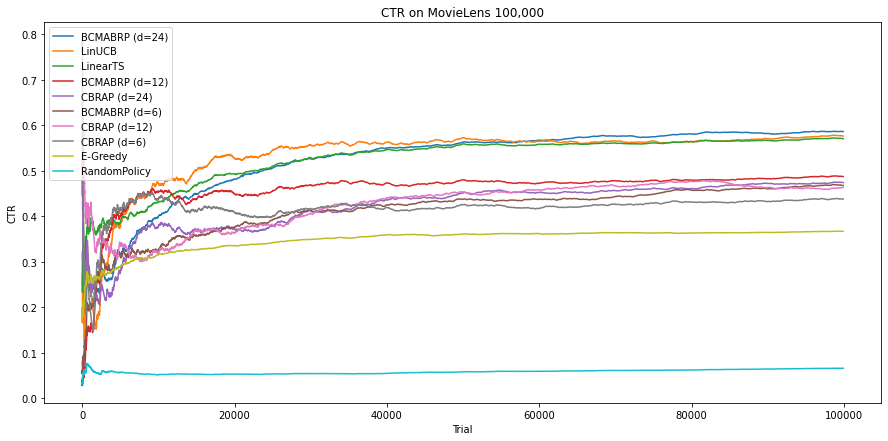

In [24]:
plot_ctrs(reward_dict);

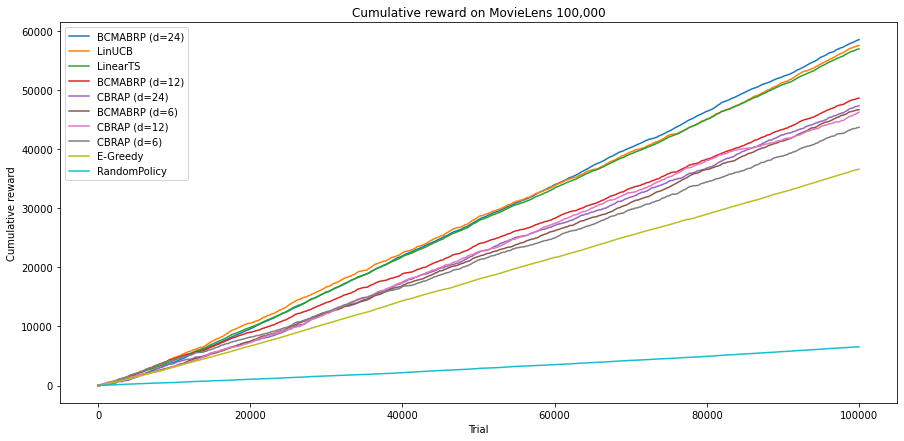

In [25]:
plot_rewards(reward_dict);

_____

|  Dataset  |     Policy     | Dimension | Time consumption (seconds) | Cumulative reward |
|:---------:|:--------------:|:---------:|:--------------------------:|:-----------------:|
|           |    LinearTS    |    120    |           4524.0           |      57015.0      |
|           |    BCMAB-RP    |     6     |           1710.8           |      46739.8      |
|           |    BCMAB-RP    |     12    |           3693.7           |      48694.2      |
| MovieLens |    BCMAB-RP    |     24    |           3813.8           |      58610.2      |
|           |     LinUCB     |    120    |           6655.8           |      45648.0      |
|           |      CBRAP     |     6     |           2230.0           |      43739.0      |
|           |      CBRAP     |     12    |           5047.1           |      46307.0      |
|           |      CBRAP     |     24    |           5157.5           |      47391.0      |
|           |      UCB1      |     -     |           1667.4           |      92563.0      |
|           | Epsilon-greedy |     -     |           1463.4           |      36645.4      |
|           |  Random policy |     -     |           1432.6           |       6551.4      |